<a href="https://colab.research.google.com/github/PPatrickGU/Projet-Adagos/blob/main/Projet_d'Adagos_imgaeRGB_3_Networks_EarlyStopping_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet d'Adagos**
### ***Author: Zheyi SHEN, Zhaoyi GUAN, Dajing GU & Anastasiya DULEPOVA*** 

In [ ]:
import cv2
import numpy as np
import random
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
# mount my google drive 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


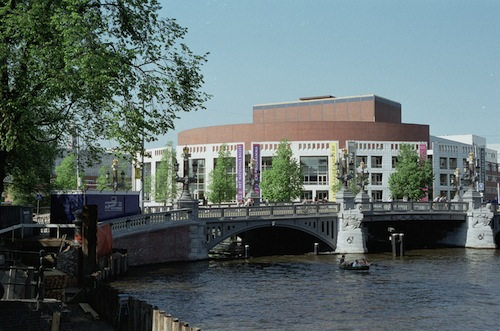

In [ ]:
# read the image
path_img = '/drive/My Drive/PIC-PROJ/image/Amst.jpg'
img = cv2.imread(path_img)
cv2_imshow(img)

## **Image procession**

In [ ]:
def random_type(img, ratio):
  (h,w,d) = img.shape
  new_img = img.copy()
  num = int(h * w * ratio)
  index_y, index_x = np.random.randint(h,size=num), np.random.randint(w,size=num)
  indexes_pix_masq = np.vstack((index_y, index_x)).transpose(1,0).tolist()
  for i in range(num):
    new_img[index_y[i],index_x[i],:] = 0 
  indexes_pix_non_masq_tmp = [[i,j] for i in range(0,h) for j in range (0,w)]  
  indexes_pix_non_masq = list(set([tuple(t) for t in indexes_pix_non_masq_tmp.copy()]) - set([tuple(t) for t in indexes_pix_masq.copy()]))
  return new_img, indexes_pix_masq, indexes_pix_non_masq


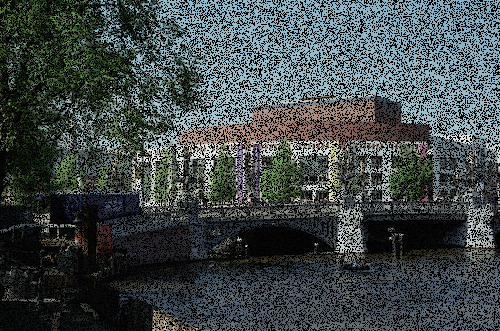

[[311, 374], [291, 330], [159, 45], [2, 186], [15, 148], [29, 459], [187, 337], [289, 340], [263, 466], [41, 472], [277, 424], [119, 297], [46, 109], [206, 431], [245, 465], [170, 53], [120, 476], [296, 377], [54, 385], [65, 467], [216, 19], [140, 474], [128, 416], [56, 74], [284, 216], [329, 114], [16, 43], [26, 269], [162, 172], [273, 389], [287, 55], [85, 344], [144, 453], [214, 89], [117, 54], [94, 431], [263, 304], [171, 310], [131, 398], [203, 142], [101, 141], [161, 180], [160, 114], [60, 429], [309, 69], [296, 257], [76, 141], [229, 307], [250, 211], [119, 317], [163, 393], [46, 53], [286, 319], [123, 388], [208, 219], [99, 89], [1, 424], [180, 47], [72, 422], [108, 73], [210, 310], [109, 134], [290, 267], [312, 292], [89, 282], [118, 415], [305, 436], [252, 144], [272, 120], [178, 138], [24, 37], [88, 275], [58, 172], [271, 173], [47, 451], [278, 11], [128, 385], [123, 435], [180, 0], [88, 168], [134, 259], [98, 447], [51, 237], [78, 424], [198, 183], [285, 479], [292, 492], [

In [ ]:
new_img, indexes_pix_masq, indexes_pix_non_masq = random_type(img,0.4)
cv2_imshow(new_img)
print(indexes_pix_masq)

In [ ]:
def grid_type(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  indexes_pix_masq = []
  for i in range(0,h,2):
    for j in range(0,w,2):
      new_img[i,j,:] = 0
      indexes_pix_masq.append([i,j])
  indexes_pix_non_masq_tmp = [[i,j] for i in range(0,h) for j in range (0,w)]  # use set to delete the repeated elements, use tuple to solve "TypeError: unhashable type: 'list'"
  indexes_pix_non_masq = list(set([tuple(t) for t in indexes_pix_non_masq_tmp.copy()]) - set([tuple(t) for t in indexes_pix_masq.copy()]))
  return new_img, indexes_pix_masq, indexes_pix_non_masq

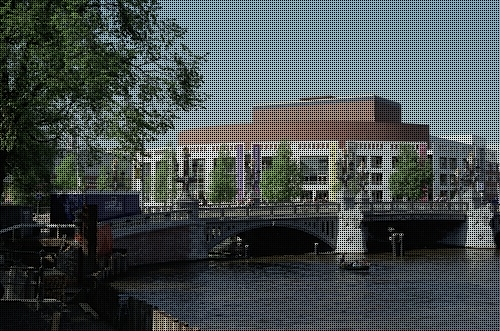

(331, 500, 3)
41500
124000


In [ ]:
# new_img, coordinate = grid_type(img)
new_img, indexes_pix_masq, indexes_pix_non_masq = grid_type(img)
cv2_imshow(new_img)
print(new_img.shape)
print(len(indexes_pix_masq))
print(len(indexes_pix_non_masq))

In [ ]:
def rectangle_type(img, hr, wr):
  (h,w,d) = img.shape
  new_img = img.copy()
  y, x = np.random.randint(h), np.random.randint(w)
  indexes_pix_masq = []
  for i in range(y,min(y+hr,h)):
    for j in range(x,min(x+wr,w)):
      new_img[i,j,:] = 0
      indexes_pix_masq.append([i,j])
  indexes_pix_non_masq_tmp = [[i,j] for i in range(0,h) for j in range (0,w)]  
  indexes_pix_non_masq = list(set([tuple(t) for t in indexes_pix_non_masq_tmp.copy()]) - set([tuple(t) for t in indexes_pix_masq.copy()]))
  return new_img, indexes_pix_masq, indexes_pix_non_masq

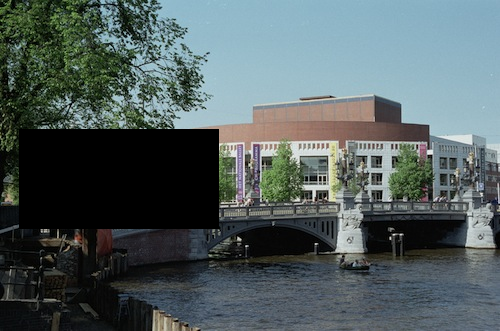

In [ ]:
new_img, indexes_pix_masq, indexes_pix_non_masq = rectangle_type(img,100,200)
cv2_imshow(new_img)  

In [ ]:
def vertical_stripes(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  indexes_pix_masq = []
  for i in range(0,h):
    for j in range(0,w,2):
      new_img[i,j,:] = 0
      indexes_pix_masq.append([i,j])
  indexes_pix_non_masq_tmp = [[i,j] for i in range(0,h) for j in range (0,w)]  
  indexes_pix_non_masq = list(set([tuple(t) for t in indexes_pix_non_masq_tmp.copy()]) - set([tuple(t) for t in indexes_pix_masq.copy()]))
  return new_img, indexes_pix_masq, indexes_pix_non_masq

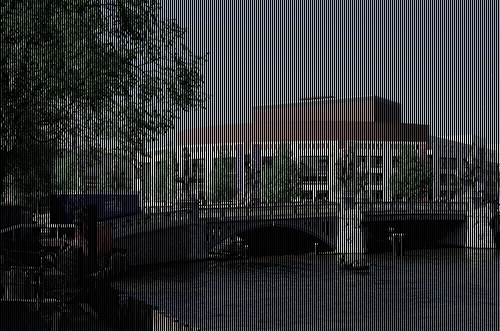

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [0, 10], [0, 12], [0, 14], [0, 16], [0, 18], [0, 20], [0, 22], [0, 24], [0, 26], [0, 28], [0, 30], [0, 32], [0, 34], [0, 36], [0, 38], [0, 40], [0, 42], [0, 44], [0, 46], [0, 48], [0, 50], [0, 52], [0, 54], [0, 56], [0, 58], [0, 60], [0, 62], [0, 64], [0, 66], [0, 68], [0, 70], [0, 72], [0, 74], [0, 76], [0, 78], [0, 80], [0, 82], [0, 84], [0, 86], [0, 88], [0, 90], [0, 92], [0, 94], [0, 96], [0, 98], [0, 100], [0, 102], [0, 104], [0, 106], [0, 108], [0, 110], [0, 112], [0, 114], [0, 116], [0, 118], [0, 120], [0, 122], [0, 124], [0, 126], [0, 128], [0, 130], [0, 132], [0, 134], [0, 136], [0, 138], [0, 140], [0, 142], [0, 144], [0, 146], [0, 148], [0, 150], [0, 152], [0, 154], [0, 156], [0, 158], [0, 160], [0, 162], [0, 164], [0, 166], [0, 168], [0, 170], [0, 172], [0, 174], [0, 176], [0, 178], [0, 180], [0, 182], [0, 184], [0, 186], [0, 188], [0, 190], [0, 192], [0, 194], [0, 196], [0, 198], [0, 200], [0, 202], [0, 204], [0, 206], [0, 208], [0, 

In [ ]:
new_img, indexes_pix_masq, indexes_pix_non_masq = vertical_stripes(img)
cv2_imshow(new_img)
print(indexes_pix_masq)

In [ ]:
def horizontal_stripes(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  indexes_pix_masq = []
  for i in range(0,h,2):
    for j in range(0,w):
      new_img[i,j,:] = 0
      indexes_pix_masq.append([i,j])
  indexes_pix_non_masq_tmp = [[i,j] for i in range(0,h) for j in range (0,w)]  
  indexes_pix_non_masq = list(set([tuple(t) for t in indexes_pix_non_masq_tmp.copy()]) - set([tuple(t) for t in indexes_pix_masq.copy()]))
  return new_img, indexes_pix_masq, indexes_pix_non_masq

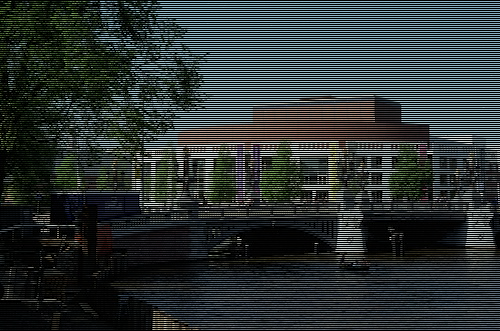

In [ ]:
new_img, indexes_pix_masq, indexes_pix_non_masq = horizontal_stripes(img)
cv2_imshow(new_img)

## **Data generation**

In [ ]:
def Data_train(img, X_train_list):
  ''' 
  Create dataset for model training
  '''
  (h,w,d) = img.shape
  new_img = img.copy()
  coordinate, rgb = [], []
  rgb = [new_img[i,j,:] for [i,j] in X_train_list]
  X_train = np.asarray(X_train_list)
  Y_train = np.asarray(rgb)
  print("Training set: ", X_train.shape, Y_train.shape)
  return X_train, Y_train

In [ ]:
def Data_test(img, X_test_list):
  ''' 
  Create dataset for model test
  '''
  (h,w,d) = img.shape
  new_img = img.copy()
  rgb = []
  rgb = [new_img[i,j,:] for [i,j] in X_test_list]
  X_test = np.asarray(X_test_list)
  Y_test = np.asarray(rgb)
  print("Testing set: ", X_test.shape, Y_test.shape)
  return X_test, Y_test

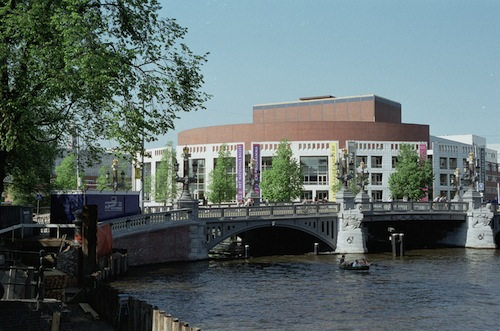

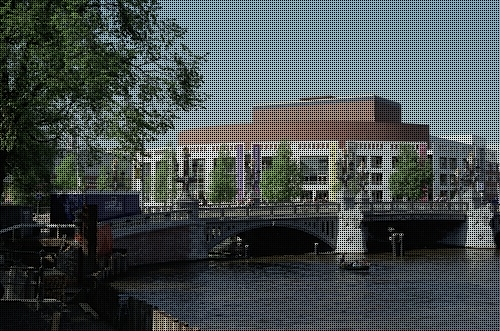

Training set:  (124000, 2) (124000, 3)
Testing set:  (41500, 2) (41500, 3)
[[266 351]
 [ 33 440]
 [109 365]
 ...
 [190 359]
 [ 63 255]
 [229 195]] [[0.08627451 0.0627451  0.03529412]
 [0.76470588 0.69803922 0.54509804]
 [0.48627451 0.56862745 0.65490196]
 ...
 [0.28235294 0.34509804 0.31764706]
 [0.79607843 0.74117647 0.6       ]
 [0.25490196 0.21960784 0.18431373]]


In [ ]:
cv2_imshow(img)
# new_img = rectangle_type(img, 100, 200) #shape [*,*,3]
# new_img, X_test_list = grid_type(img) #shape [*,*,3]
new_img, X_test_list, X_train_list = grid_type(img)
cv2_imshow(new_img)
img2 = img/255
new_img2 = new_img/255 # nomalization


#X_train, Y_train = Data_train(new_img2, X_test_list)
X_train, Y_train = Data_train(new_img2, X_train_list)
X_test, Y_test = Data_test(img2, X_test_list)
print(X_train, Y_train)

## **Model creation using Keras**

In [ ]:
import tensorflow as tf
from tensorflow.keras import *
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.4.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
backend.clear_session()

In [ ]:
# class Network1(tf.keras.Model):
#     def __init__(self):
#         super(Network1, self).__init__()
#         self.fc1 = layers.Dense(units=30, activation='relu')
#         self.fc2 = layers.Dense(units=1, activation='sigmoid')
#     def call(self, inputs, training=None, mask=None):
#         x = self.fc1(inputs)
#         x = self.fc2(x)
#         return x

# class Network2(tf.keras.Model):
#     def __init__(self):
#         super(Network2, self).__init__()
#         self.fc1 = layers.Dense(units=30, activation='relu')
#         self.fc2 = layers.Dense(units=1, activation='sigmoid')
#     def call(self, inputs, training=None, mask=None):
#         x = self.fc1(inputs)
#         x = self.fc2(x)
#         return x

# class Network3(tf.keras.Model):
#     def __init__(self):
#         super(Network3, self).__init__()
#         self.fc1 = layers.Dense(units=30, activation='relu')
#         self.fc2 = layers.Dense(units=1, activation='sigmoid')
#     def call(self, inputs, training=None, mask=None):
#         x = self.fc1(inputs)
#         x = self.fc2(x)
#         return x

In [ ]:
class Network1(tf.keras.Model):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1 = layers.Dense(units=20, activation='relu')
        self.fc2 = layers.Dense(units=10, activation='relu')
        self.fc3 = layers.Dense(units=1, activation='sigmoid')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

class Network2(tf.keras.Model):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = layers.Dense(units=20, activation='relu')
        self.fc2 = layers.Dense(units=10, activation='relu')
        self.fc3 = layers.Dense(units=1, activation='sigmoid')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

class Network3(tf.keras.Model):
    def __init__(self):
        super(Network3, self).__init__()
        self.fc1 = layers.Dense(units=20, activation='relu')
        self.fc2 = layers.Dense(units=10, activation='relu')
        self.fc3 = layers.Dense(units=1, activation='sigmoid')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [ ]:
model1 = Network1() 
model1.build(input_shape=(None, 2)) # num_batch, input_size
model1.summary() # print the network

model2 = Network2() 
model2.build(input_shape=(None, 2)) # num_batch, input_size
model2.summary() # print the network

model3 = Network3() 
model3.build(input_shape=(None, 2)) # num_batch, input_size
model3.summary() # print the network

Model: "network1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  60        
_________________________________________________________________
dense_1 (Dense)              multiple                  210       
_________________________________________________________________
dense_2 (Dense)              multiple                  11        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "network2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  60        
_________________________________________________________________
dense_4 (Dense)              multiple                  210       
__________________________________________

## **Model training demo (using Keras)**

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,
                              patience=2, verbose=0, mode='auto',
                              baseline=None, restore_best_weights=False)

In [ ]:
model1.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history1 = model1.fit(X_train, Y_train[:,0], batch_size=128, epochs=1000, validation_split=0.2, shuffle = True, callbacks = [early_stopping])
print('Training finished:')


Begin training:
Epoch 1/1000
775/775 [==============================] - 2s 2ms/step - loss: 0.2105 - val_loss: 0.1422
Epoch 2/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1454 - val_loss: 0.1400
Epoch 3/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1415 - val_loss: 0.1397
Epoch 4/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1393 - val_loss: 0.1382
Epoch 5/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1356 - val_loss: 0.1245
Epoch 6/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1262 - val_loss: 0.1180
Epoch 7/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1210 - val_loss: 0.1168
Epoch 8/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1195 - val_loss: 0.1216
Epoch 9/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1195 - val_loss: 0.1162
Epoch 10/1000
775/775 [==============================] - 1s 2ms/st

In [ ]:
model2.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history2 = model2.fit(X_train, Y_train[:,1], batch_size=128, epochs=1000, validation_split=0.2, shuffle = True, callbacks = [early_stopping])
print('Training finished:')

Begin training:
Epoch 1/1000
775/775 [==============================] - 2s 2ms/step - loss: 0.2560 - val_loss: 0.1400
Epoch 2/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1424 - val_loss: 0.1296
Epoch 3/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1392 - val_loss: 0.1356
Epoch 4/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1363 - val_loss: 0.1280
Epoch 5/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1372 - val_loss: 0.1335
Epoch 6/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1372 - val_loss: 0.1437
Training finished:


In [ ]:
model3.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history3 = model3.fit(X_train, Y_train[:,2], batch_size=128, epochs=1000, validation_split=0.2, shuffle = True, callbacks = [early_stopping])
print('Training finished:')

Begin training:
Epoch 1/1000
775/775 [==============================] - 2s 2ms/step - loss: 0.2758 - val_loss: 0.1325
Epoch 2/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1457 - val_loss: 0.1410
Epoch 3/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1441 - val_loss: 0.1291
Epoch 4/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1453 - val_loss: 0.1340
Epoch 5/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1411 - val_loss: 0.1226
Epoch 6/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1383 - val_loss: 0.1265
Epoch 7/1000
775/775 [==============================] - 1s 2ms/step - loss: 0.1421 - val_loss: 0.1393
Training finished:


In [ ]:
print('Begin testing:')
result_r = model1.predict(X_test)
result_g = model2.predict(X_test)
result_b = model3.predict(X_test)
result = np.concatenate((result_r, result_g, result_b), axis = 1)
result_denormalization = result*255 #denormalization
print(result_denormalization)

Begin testing:
[[ 24.273407 124.55513   34.342896]
 [ 19.016739 146.36552   76.10234 ]
 [ 14.860936 153.74307  122.11331 ]
 ...
 [ 99.301674  71.563255  37.212067]
 [ 99.52568   71.72955   37.03964 ]
 [ 99.74999   71.8969    36.86775 ]]


## **Reconstruction of image and calculation of test loss**

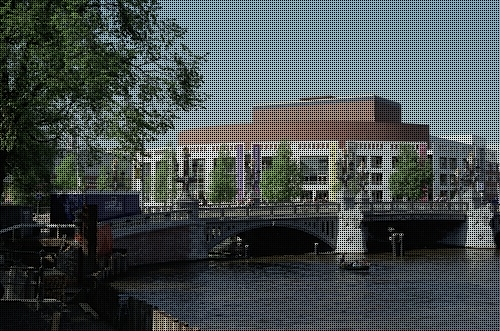

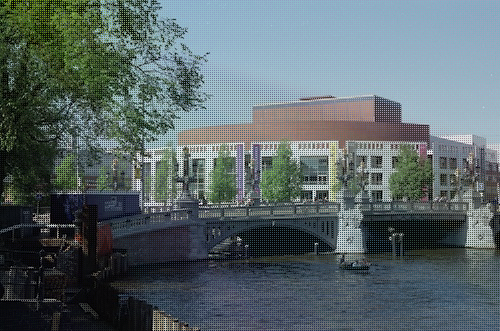

In [ ]:
cv2_imshow(new_img)
# reconstruction of image
reconstructed_img = new_img.copy()

for i in range(len(X_test)):
    x, y = int(X_test[i][0]), int(X_test[i][1])
    r, g, b = result_denormalization[i,:]
    reconstructed_img[x,y,:] = [r,g,b]
cv2_imshow(reconstructed_img)

In [ ]:
Loss_test = np.linalg.norm(result-Y_test/255,ord=None,axis=1,keepdims=True)
Loss_test_denormalized = np.linalg.norm(result_denormalization-Y_test,ord=None,axis=1,keepdims=True)
print("Loss_test: ", np.mean(Loss_test))
print("Loss_test_denormalized: ", np.mean(Loss_test_denormalized))

Loss_test:  0.6340942864421163
Loss_test_denormalized:  161.69404304986318


## **Model training (without using Keras): too slow**

In [ ]:
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

In [ ]:
def train_step(model, inputs, labels): #inputs：X_train; labels：Y_train
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = tf.keras.losses.mean_squared_error(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)

In [ ]:
def test_step(model, inputs, labels): #inputs：X_train; labels：Y_train
  predictions = model(inputs)
  t_loss = tf.keras.losses.mean_squared_error(labels, predictions)
  test_loss(t_loss)

In [ ]:
# EPOCHS = 5

# for epoch in range(EPOCHS):
#   # train_loss.reset_states()
#   # test_loss.reset_states()
# # len(X_train)
#   for i in range(1,len(X_train)):
#     train_step(model, X_train[i,:].reshape(1,2), Y_train[i])

#   for i in range(1,len(X_validate)):
#     test_step(model, X_validate, Y_validate)

#   template = 'Epoch {}, Loss: {}, Test Loss: {}'
#   print(template.format(epoch+1,train_loss.result(),test_loss.result()))